In [1]:
import pandas as pd

In [34]:
crypto_raw = pd.read_csv('crypto_data.csv')
crypto_traded = crypto_raw[crypto_raw['IsTrading'] == True]
crypto_traded_clean = crypto_traded.dropna()
crypto_traded_mined = crypto_traded_clean[crypto_traded_clean['TotalCoinsMined'] >= 0].drop(columns = {'CoinName','Unnamed: 0'})

crypto_traded_mined.dtypes
crypto_traded_mined['TotalCoinSupply'] = pd.to_numeric(crypto_traded_mined['TotalCoinSupply'])


crypto_traded_mined.head()


,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08
4,SHA-256,True,PoW/PoS,0.000000e+00,0.000000e+00
5,X13,True,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,True,PoW,1.792718e+07,2.100000e+07


In [36]:
crypto_dummy = pd.get_dummies(crypto_traded_mined) 
crypto_dummy

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,True,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,True,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,True,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,True,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,True,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,True,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,True,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,True,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,True,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
scaled_crypto = StandardScaler().fit(crypto_dummy)
scaled_crypto_tran = scaled_crypto.transform(crypto_dummy)
scaled_crypto_tran

array([[ 0.        , -0.10312268, -0.03826639, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [ 0.        , -0.07692584, -0.03826624, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [ 0.        , -0.10312268, -0.03826639, ..., -0.03826394,
        -0.03826394, -0.03826394],
       ...,
       [ 0.        , -0.07878691, -0.03826599, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [ 0.        , -0.10294153, -0.03826638, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [ 0.        , -0.10311949, -0.03826639, ..., -0.03826394,
        -0.03826394, -0.03826394]])

In [50]:
pca = PCA(n_components=.9)
scaled_crypto_tran_pca = pca.fit_transform(scaled_crypto_tran)
scaled_crypto_tran_pca_df = pd.DataFrame(scaled_crypto_tran_pca)
scaled_crypto_tran_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,-0.226763,-1.247056,-0.443753,-0.000000e+00,9.411632e-20,-0.000000e+00,-5.757688e-08,0.001952,-1.113359,-0.290471,...,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
1,-0.212358,-1.245630,-0.444386,-1.217844e-16,-6.724125e-17,-1.619741e-16,-5.757689e-08,0.000574,-1.116438,-0.291084,...,-1.858461e-16,9.543044e-17,-1.143091e-16,3.392571e-16,2.171480e-16,-1.248558e-16,-3.518663e-16,1.631638e-16,2.537847e-16,-1.956260e-16
2,-0.156176,-0.829299,-0.273513,2.725732e-15,6.693251e-16,5.340940e-15,-4.256666e-08,-0.009525,-0.627418,-0.092659,...,-1.677520e-15,-3.361109e-15,3.943944e-15,-3.069972e-15,1.679992e-15,1.611775e-15,6.798965e-15,6.841530e-15,-9.440092e-15,4.129108e-15
3,0.286000,-1.982529,-0.480747,9.400181e-15,3.167416e-15,1.993383e-14,-8.469857e-08,-0.043232,-0.829931,-0.235206,...,1.392604e-14,2.431404e-14,6.397462e-14,-2.320548e-14,-2.345056e-14,-8.603699e-15,2.833091e-14,-8.178054e-14,-3.250071e-14,-2.438002e-14
4,-0.211787,1.470995,0.116681,-6.906446e-15,-2.828369e-15,-2.063516e-14,3.378969e-08,-0.001314,0.063770,0.080055,...,1.299422e-15,-3.214406e-15,5.018315e-15,-4.393710e-15,-1.977076e-17,-1.305311e-16,6.469800e-15,1.499688e-15,-9.164630e-15,3.672334e-15


In [51]:
from sklearn.manifold import TSNE

In [53]:
tsne_crypto = TSNE(learning_rate=35)
tsne_crypto_features = tsne_crypto.fit_transform(scaled_crypto_tran_pca_df)

In [54]:
import matplotlib.pyplot as plt

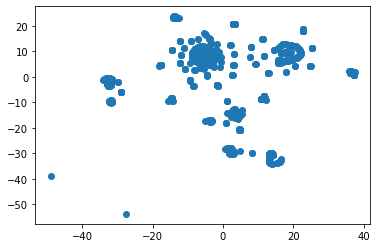

In [55]:
scaled_crypto_tran_pca_df['x'] = tsne_crypto_features[:,0]
scaled_crypto_tran_pca_df['y'] = tsne_crypto_features[:,1]
plt.scatter(scaled_crypto_tran_pca_df['x'],scaled_crypto_tran_pca_df['y'])

In [56]:
from sklearn.cluster import KMeans

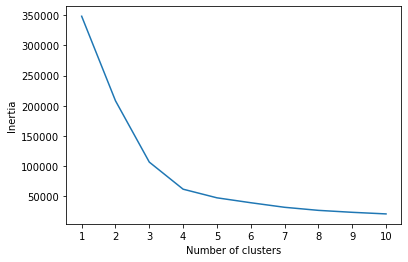

In [57]:
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_crypto_features)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()